# Project Summary

In [9]:
from game import Game
from investigate_game import InvestigateGame
from random_player import RandomPlayer
from min_max import MinMaxPlayer, AlphaBetaMinMaxPlayer
from q_learning import QLearningRLPlayer
import matplotlib.pyplot as plt
import numpy as np

## Train a Q-learning player

In [10]:
def plot_training_stats(rewards: list, step_size: int, switch_ratio: int | None = None) -> None:
    """
    Given a training list of rewards, this function plots the averages of the rewards
    using a given step size.

    Args:
        rewards: the rewards achieved during training time;
        step: the step size to be used to plot an average value;
        switch_ratio: define the moment in which minmax started playing-

    Returns:
        None.
    """

    # https://stackoverflow.com/questions/15956309/averaging-over-every-n-elements-of-a-numpy-array
    # compute the averages
    averages = np.mean(np.array(rewards).reshape(-1, step_size), axis=1)

    # define the width and height of the figure in inches
    plt.figure(figsize=(10, 5))
    # plot the averages
    plt.plot(averages, color='red', marker='o', linestyle='dashed', label='Training')
    # if minmax played
    if switch_ratio is not None:
        # compute the exact moment
        switch_moment = int(len(rewards) / step_size * switch_ratio)
        # print a vertical line at the moment minmax started playing
        plt.axvline(x=switch_moment, color='green', label='MinMax Starts Playing')
    # specify the title
    plt.title('Training Summary')
    # specify the x-axis label
    plt.xlabel('# of the step')
    # specify the y-axis label
    plt.ylabel('Mean reward value')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

In [11]:
# create the Q-learning player
q_learning_rl_agent = QLearningRLPlayer(
    n_episodes=1_000,
    alpha=0.1,
    gamma=0.99,
    min_exploration_rate=0.01,
    exploration_decay_rate=1e-4,
    minmax=True,
)
# train the Q-learning player
q_learning_rl_agent.train(max_steps_draw=10)
# print the number of explored states
print(f'Number of explored states: {len(q_learning_rl_agent._q_table.keys())}')
# serialize the Q-learning player
q_learning_rl_agent.save('agents/q_learning_agent_1.pkl')

Win? Yes - Current exploration rate: 0.904928: 100%|██████████| 1000/1000 [00:41<00:00, 24.07it/s]

** Last 1_000 episodes - Mean rewards value: -1.56 **
** Last rewards value: 10 **
Number of explored states: 2740


In [12]:
# load the Q-learning player
q_learning_rl_agent.load('agents/q_learning_agent_1.pkl')

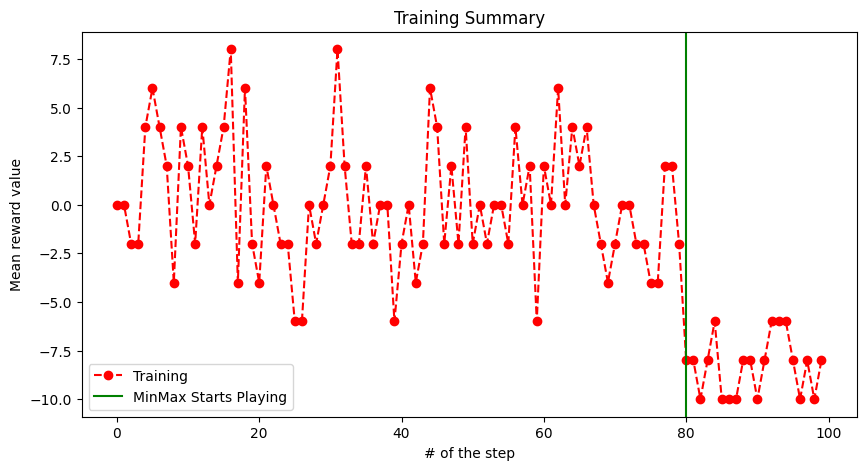

In [15]:
# get the rewards
rewards = q_learning_rl_agent.rewards
# plot the averages of the training rewards
plot_training_stats(rewards, step_size=10, switch_ratio=0.8)

## Play Games

In [14]:
# create the first player
player1 = MinMaxPlayer(player_id=0, depth=2, symmetries=False)
# create the second player
player2 = AlphaBetaMinMaxPlayer(player_id=1, depth=3, symmetries=False)
# create a new game
game = InvestigateGame(Game())
# LET'S BATTLE
winner = game.play(player1, player2, max_steps_draw=10)

-- BEGINNING OF THE GAME --
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
Player ❌ chose to move (0, 0) to the bottom
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
❌⬜️⬜️⬜️⬜️
Player ⭕️ chose to move (0, 0) to the bottom
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
❌⬜️⬜️⬜️⬜️
⭕️⬜️⬜️⬜️⬜️
Player ❌ chose to move (0, 0) to the bottom
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
❌⬜️⬜️⬜️⬜️
⭕️⬜️⬜️⬜️⬜️
❌⬜️⬜️⬜️⬜️
Player ⭕️ chose to move (1, 0) to the bottom
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
❌⬜️⬜️⬜️⬜️
⭕️⬜️⬜️⬜️⬜️
❌⭕️⬜️⬜️⬜️
Player ❌ chose to move (0, 0) to the right
⬜️⬜️⬜️⬜️❌
⬜️⬜️⬜️⬜️⬜️
❌⬜️⬜️⬜️⬜️
⭕️⬜️⬜️⬜️⬜️
❌⭕️⬜️⬜️⬜️
Player ⭕️ chose to move (0, 0) to the bottom
⬜️⬜️⬜️⬜️❌
❌⬜️⬜️⬜️⬜️
⭕️⬜️⬜️⬜️⬜️
❌⬜️⬜️⬜️⬜️
⭕️⭕️⬜️⬜️⬜️
Player ❌ chose to move (0, 0) to the bottom
❌⬜️⬜️⬜️❌
⭕️⬜️⬜️⬜️⬜️
❌⬜️⬜️⬜️⬜️
⭕️⬜️⬜️⬜️⬜️
❌⭕️⬜️⬜️⬜️
Player ⭕️ chose to move (2, 0) to the bottom
❌⬜️⬜️⬜️❌
⭕️⬜️⬜️⬜️⬜️
❌⬜️⬜️⬜️⬜️
⭕️⬜️⬜️⬜️⬜️
❌⭕️⭕️⬜️⬜️
Player ❌ chose to move (0, 2) to the right
❌⬜️⬜️⬜️❌
⭕️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️❌
⭕️⬜️⬜️⬜️⬜️
❌⭕️⭕️⬜️⬜️
Player ⭕️ chose to move (0, 2) to the top
⭕️⬜️⬜️